In [1]:
#Please execute this cell
import sys
sys.path.append('../')
import jupman
from soft import draw_mat, draw_adj, draw_nx
%matplotlib inline

# Binary relations solutions

## [Download exercises zip](../_static/generated/binary-relations.zip)

[Browse files online](https://github.com/DavidLeoni/sciprog-ds/tree/master/binary-relations)

We can use graphs to model relations of many kinds, like _isCloseTo,_ _isFriendOf,_ _loves,_ etc. Here we review some of them and their properties.

**Before going on, make sure to have read the chapter** [Graph formats](https://sciprog.davidleoni.it/graph-formats/graph-formats-sol.html)


## What to do

- unzip exercises in a folder, you should get something like this: 

```
binary-relations
    binary-relations.ipynb     
    binary-relations-sol.ipynb         
    jupman.py
    soft.py      
```

<div class="alert alert-warning">

**WARNING**: to correctly visualize the notebook, it MUST be in an unzipped folder !
</div>


- open Jupyter Notebook from that folder. Two things should open, first a console and then browser. The browser should show a file list: navigate the list and open the notebook `binary-relations/binary-relations.ipynb`

<div class="alert alert-warning">

**WARNING 2**: DO NOT use the _Upload_ button in Jupyter, instead navigate in Jupyter browser to the unzipped folder !
</div>


- Go on reading that notebook, and follow instuctions inside.


Shortcut keys:

- to execute Python code inside a Jupyter cell, press `Control + Enter`
- to execute Python code inside a Jupyter cell AND select next cell, press `Shift + Enter`
- to execute Python code inside a Jupyter cell AND a create a new cell aftwerwards, press `Alt + Enter`
- If the notebooks look stuck, try to select `Kernel -> Restart`


## Reflexive relations

A graph is reflexive when each node links to itself.

In real life, the typical reflexive relation could be "is close to" , supposing "close to" means being within a 100 meters distance. Obviously, any place is always close to itself, let's see an example (Povo is a small town around Trento):

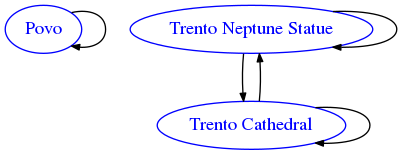

In [2]:
from soft import draw_adj

draw_adj({
    'Trento Cathedral' : ['Trento Cathedral', 'Trento Neptune Statue'],
    'Trento Neptune Statue' : ['Trento Neptune Statue', 'Trento Cathedral'],
    'Povo' : ['Povo'],
})

Some relations might not always be necessarily reflexive, like "did homeworks for". You should always do your own homeworks, but to our dismay, university intelligence services caught some of you cheating. In the following example we expose the situation - due to privacy concerns, we identify students with numbers starting from zero included:

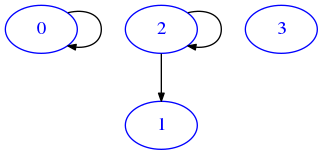

In [3]:
from soft import draw_mat

draw_mat(
    [
        [True, False, False, False],
        [False, False, False, False],
        [False, True, True, False],
        [False, False, False, False],
    ]

)

From the graph above, we see student 0 and student 2 both did their own homeworks. Student 3 did no homerworks at all. Alarmingly, we notice student 2 did the homeworks for student 1. Resulting conspiration shall be severely punished with a one year ban from having spritz at Emma's bar.

### Exercise - is_reflexive_mat

✪✪ Implement a function that RETURN `True` if nxn boolean matrix mat as list of lists is reflexive, `False` otherwise.
    
A graph is _reflexive_ when all nodes point to themselves. 

- Please at least try to make the function efficient

In [4]:
def is_reflexive_mat(mat):        
    #jupman-raise
    n = len(mat)
    for i in range(n):
        if not mat[i][i]:
            return False
    return True
    #/jupman-raise
    
assert is_reflexive_mat([ [False] ]) == False   # m1
assert is_reflexive_mat([ [True] ]) == True  # m2

assert is_reflexive_mat([ [False, False],
                          [False, False] ]) == False  # m3 

assert is_reflexive_mat([ [True, True],
                          [True, True] ]) == True  # m4

assert is_reflexive_mat([ [True, True],
                          [False, True] ]) == True  # m5

assert is_reflexive_mat([ [True, False],
                          [True, True] ]) == True  # m6

assert is_reflexive_mat([ [True, True],
                          [True, False] ]) == False  # m7

assert is_reflexive_mat([ [False, True],
                          [True, True] ]) == False  # m8

assert is_reflexive_mat([ [False, True],
                          [True, False] ]) == False  # m9

assert is_reflexive_mat([ [False, False],
                          [True, False] ]) == False    # m10

assert is_reflexive_mat([ [False, True, True],
                          [True, False, False],
                          [True, True, True] ]) == False    # m11

assert is_reflexive_mat([ [True, True, True],
                          [True, True, True],
                          [True, True, True] ]) == True    # m12    

### Exercise - is_reflexive_adj

✪✪ Implement now the same function for dictionaries of adjacency lists:

RETURN `True` if provided graph as dictionary of adjacency lists is reflexive, `False` otherwise.
    
- A graph is _reflexive_ when all nodes point to themselves.
- Please at least try to make the function efficient.

In [5]:
def is_reflexive_adj(d):    
    #jupman-raise
    
    for v in d:
        if not v in d[v]:
            return False
    return True
    #/jupman-raise
    
assert is_reflexive_adj({ 'a':[] }) == False   # d1
assert is_reflexive_adj({ 'a':['a'] }) == True  # d2

assert is_reflexive_adj({ 'a':[],
                          'b':[] 
                        }) == False  # d3 

assert is_reflexive_adj({ 'a':['a'],
                          'b':['b'] 
                        }) == True  # d4

assert is_reflexive_adj({ 'a':['a','b'],
                          'b':['b'] 
                        }) == True  # d5

assert is_reflexive_adj({ 'a':['a'],
                          'b':['a','b'] 
                        }) == True  # d6


assert is_reflexive_adj({ 'a':['a','b'],
                          'b':['a'] 
                        }) == False  # d7

assert is_reflexive_adj({ 'a':['b'],
                          'b':['a','b']
                        }) == False  # d8

assert is_reflexive_adj({ 'a':['b'],
                          'b':['a']
                        }) == False  # d9

assert is_reflexive_adj({ 'a':[],
                          'b':['a']
                        }) == False    # d10

assert is_reflexive_adj({ 'a':['b','c'],
                          'b':['a'],
                          'c':['a','b','c']
                        }) == False    # d11

assert is_reflexive_adj({ 'a':['a','b','c'],
                          'b':['a','b','c'],
                          'c':['a','b','c']
                        }) == True    # d12    

## Symmetric relations

A graph is symmetric when for all nodes, if a node A links to another node B, there is a also a link from node B to A. 

In real life, the typical symmetric relation is "is friend of". If you are friend to somene, that someone should be also be your friend.

For example, since Scrooge typically is not so friendly with his lazy nephew Donald Duck, but certainly both Scrooge and Donald Duck enjoy visiting the farm of Grandma Duck, we can model their friendship relation like this:

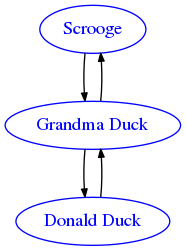

In [6]:
from soft import draw_adj

draw_adj({
    'Donald Duck' : ['Grandma Duck'],
    'Scrooge' : ['Grandma Duck'],
    'Grandma Duck' : ['Scrooge', 'Donald Duck'],
})

Not that Scrooge is not linked to Donald Duck, but this does not mean the whole graph cannot be considered symmetric. If you pay attention to the definition above, there is _if_ written at the beginning: _if_  a node A links to another node B, there is a also a link from node B to A. 



**QUESTION**: Looking purely at the above definition (so do _not_ consider 'is friend of' relation), should a symmetric relation be necessarily reflexive?

**ANSWER**: No, in a symmetric relation some nodes can be linked to themseves, while some other nodes may have no link to themselves. All we care about to check symmetry is links from a node to _other_ nodes. 



**QUESTION**: Think about the semantics of the specific "is friend of" relation: can you think of a social network where the relation is not shown as reflexive?


**ANSWER**: In the particular case of "is friend to" relation is interesting, as it prompts us  to think about the semantic meaning of the relation: obviously, everybody _should_ be a friend of himself/herself - but if were to implement say a social network service like Facebook, it would look rather useless to show in your your friends list the information that you are a friend of yourself. 



**QUESTION**: Always talking about the specific semantics of "is friend of" relation: can you think about some case where it should be meaningful to store information about individuals _not_ being friends of themselves ?

**ANSWER**: in real life it may always happen to find fringe cases - suppose you are given the task to model a network of possibly depressed people with self-harming tendencies. So always be sure your model correctly fits the problem at hand.


Some relations sometimes may or not be symmetric, depending on the graph at hand. Think about the relation _loves_. It is well known that Mickey Mouse lovel Minnie and the sentiment is reciprocal, and Donald Duck loves Daisy Duck and the sentiment is reciprocal. We can conclude this particular graph is symmetrical:

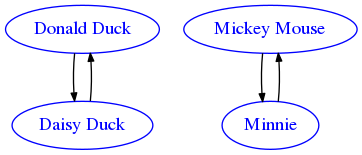

In [7]:
from soft import draw_adj

draw_adj({
    'Donald Duck' : ['Daisy Duck'],
    'Daisy Duck' : ['Donald Duck'],
    'Mickey Mouse' : ['Minnie'],
    'Minnie' : ['Mickey Mouse']
    
})

But what about this one? Donald Duck is not the only duck in town and sometimes a contender shows up: [Gladstone Gander](https://en.wikipedia.org/wiki/Gladstone_Gander) (Gastone in Italian) also would like the attention of Daisy ( never mind in some comics he actually gets it when Donald Duck messes up big time): 


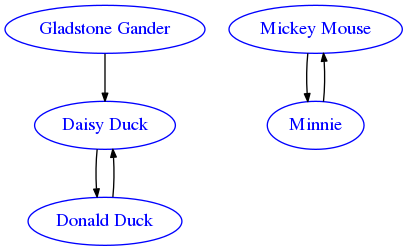

In [8]:
from soft import draw_adj

draw_adj({
    'Donald Duck' : ['Daisy Duck'],
    'Daisy Duck' : ['Donald Duck'],
    'Mickey Mouse' : ['Minnie'],
    'Minnie' : ['Mickey Mouse'],
    'Gladstone Gander' : ['Daisy Duck']
    
})

### Exercise - is_symmetric_mat

✪✪ Implement an automated procedure to check whether or not a graph is symmetrical, which given a matrix as a list of lists that RETURN `True` if `n`x`n` boolean matrix mat as list of lists is symmetric, `False` otherwise.
    
- A graph is symmetric when for all nodes, if a node A links to another node B, there is a also a link from node B to A. 

In [9]:

def is_symmetric_mat(mat):
    #jupman-raise
    n = len(mat)
    for i in range(n):
        for j in range(n):
            if mat[i][j] and not mat[j][i]:
                return False
    return True
    #/jupman-raise
    
assert is_symmetric_mat([ [False] ]) == True   # m1
assert is_symmetric_mat([ [True] ]) == True  # m2

assert is_symmetric_mat([ [False, False],
                          [False, False] ]) == True  # m3 

assert is_symmetric_mat([ [True, True],
                          [True, True] ]) == True  # m4

assert is_symmetric_mat([ [True, True],
                          [False, True] ]) == False  # m5

assert is_symmetric_mat([ [True, False],
                          [True, True] ]) == False  # m6

assert is_symmetric_mat([ [True, True],
                          [True, False] ]) == True  # m7

assert is_symmetric_mat([ [False, True],
                          [True, True] ]) == True  # m8

assert is_symmetric_mat([ [False, True],
                          [True, False] ]) == True  # m9

assert is_symmetric_mat([ [False, False],
                          [True, False] ]) == False    # m10

assert is_symmetric_mat([ [False, True, True],
                          [True, False, False],
                          [True, True, True] ]) == False    # m11

assert is_symmetric_mat([ [False, True, True],
                          [True, False, True],
                          [True, True, True] ]) == True    # m12

### Exercise - is_symmetric_adj

✪✪ Now implement the same as before but for a dictionary of adjacency lists:

RETURN `True` if given dictionary of adjacency lists is symmetric, `False` otherwise.
    
- Assume all the nodes are represented in the keys.
    
- A graph is symmetric when for all nodes, if a node A links to another node B, 
  there is a also a link from node B to A. 

In [10]:

def is_symmetric_adj(d):
    #jupman-raise
    for k in d:
        for v in d[k]:
            if not k in d[v]:
                return False
    return True
    #/jupman-raise
    
assert is_symmetric_adj({ 'a':[] }) == True   # d1
assert is_symmetric_adj({ 'a':['a'] }) == True  # d2

assert is_symmetric_adj({ 'a' : [],
                          'b' : []
                        }) == True  # d3 

assert is_symmetric_adj({ 'a' : ['a','b'],
                          'b' : ['a','b']    
                        }) == True  # d4

assert is_symmetric_adj({ 'a' : ['a','b'],
                          'b' : ['b']    
                        }) == False  # d5

assert is_symmetric_adj({ 'a' : ['a'],
                          'b' : ['a','b']    
                        }) == False  # d6

assert is_symmetric_adj({ 'a' : ['a','b'],
                          'b' : ['a']    
                        }) == True  # d7

assert is_symmetric_adj({ 'a' : ['b'],
                          'b' : ['a','b']    
                        }) == True  # d8

assert is_symmetric_adj({ 'a' : ['b'],
                          'b' : ['a']    
                        }) == True  # d9

assert is_symmetric_adj({ 'a' : [],
                          'b' : ['a']    
                        }) == False    # d10

assert is_symmetric_adj({ 'a' : ['b', 'c'],
                          'b' : ['a'],
                          'c' : ['a','b','c']
                        }) == False    # d11

assert is_symmetric_adj({ 'a' : ['b', 'c'],
                          'b' : ['a','c'],
                          'c' : ['a','b','c']
                        }) == True    # d12 

## Surjective relations

If we consider a graph as a nxn binary relation where the domain is the same as the codomain, such relation is called _surjective_ if every node is reached by _at least_ one edge. 

For example, `G1` here is surjective, because there is at least one edge reaching into each node (self-loops as in 0 node also count as incoming edges)

In [11]:
G1 = [
        [True, True, False, False],
        [False, False,  False, True],
        [False, True, True, False],
        [False, True, True, True],
    
     ]


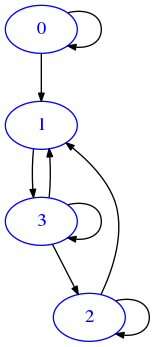

In [12]:
draw_mat(G1)

`G2` down here instead does not represent a surjective relation, as there is _at least_ one node ( `2` in our case) which does not have any incoming edge: 

In [13]:
G2 = [
        [True, True, False, False],
        [False, False,  False, True],
        [False, True, False, False],
        [False, True, False, False],
    
     ]


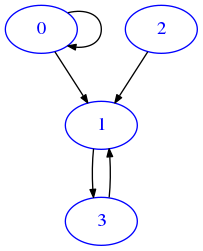

In [14]:
draw_mat(G2)

### Exercise - surjective

✪✪ RETURN `True` if provided graph `mat` as list of boolean lists is an `n`x`n` surjective binary relation, otherwise return `False`    

In [15]:
def surjective(mat):     
    #jupman-raise
    n = len(mat)
    c = 0   # number of incoming edges found
    for j in range(len(mat)):      # go column by column
        for i in range(len(mat)):  # go row by row
            if mat[i][j]: 
                c += 1      
                break    # as you find first incoming edge, increment c and stop search for that column
    return c == n
    #/jupman-raise
    
    
    
m1 =  [ [False] ]

assert surjective(m1) == False


m2 =  [ [True] ]

assert surjective(m2) == True

m3 =  [ [True, False],
        [False, False] ]

assert surjective(m3) == False


m4 =  [ [False, True],
        [False, False] ]

assert surjective(m4) == False

m5 =  [ [False, False],
        [True, False] ]

assert surjective(m5) == False

m6 =  [ [False, False],
        [False, True] ]

assert surjective(m6) == False


m7 =  [ [True, False],
        [True, False] ]

assert surjective(m7) == False

m8 =  [ [True, False],
        [False, True] ]

assert surjective(m8) == True


m9 =  [ [True, True],
        [False, True] ]

assert surjective(m9) == True


m10 = [ [True, True, False, False],
        [False, False,  False, True],
        [False, True, False, False],
        [False, True, False, False] ]
assert surjective(m10) == False

m11 = [ [True, True, False, False],
        [False, False,  False, True],
        [False, True, True, False],
        [False, True, True, True] ]
assert surjective(m11) == True


## Further resources

* [Rule based design](https://www.researchgate.net/profile/Stef_Joosten/publication/327022933_Rule_Based_Design/links/5b7321be45851546c903234a/Rule-Based-Design.pdf) by Lex Wedemeijer, Stef Joosten, Jaap van der woude: a very readable text on how to represent information using only binary relations with boolean matrices. This a theorical book with no python exercise so it is not a mandatory read, it only gives  context and practical applications for some of the material on graphs presented during the course